# Notebook 02 — Análise Exploratória de Dados (EDA)
Este notebook utiliza os dados brutos coletados da API CoinGecko para realizar
análises exploratórias que ajudarão a entender o comportamento das criptomoedas.

Etapas:
- Carregar o dataset bruto
- Verificar consistência
- Analisar preço, volume e market cap
- Visualizar padrões e correlações


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")


In [2]:
df = pd.read_csv("../data/raw/prices_raw.csv")
df['timestamp'] = pd.to_datetime(df['timestamp'])

df.head()

,timestamp,price,volume,market_cap,coin
0,2025-08-02,113234.605134,6.579468e+10,2.253610e+12,bitcoin
1,2025-08-03,112554.902322,3.354344e+10,2.240414e+12,bitcoin
2,2025-08-04,114199.109665,2.468927e+10,2.272802e+12,bitcoin
3,2025-08-05,115138.686131,3.248802e+10,2.292395e+12,bitcoin
4,2025-08-06,114128.354089,3.731621e+10,2.271583e+12,bitcoin


## Verificando a estrutura do dataset


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2057 entries, 0 to 2056
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   timestamp   2057 non-null   datetime64[ns]
 1   price       2057 non-null   float64       
 2   volume      2057 non-null   float64       
 3   market_cap  2057 non-null   float64       
 4   coin        2057 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 80.5+ KB


## Estatísticas descritivas
Essas estatísticas ajudam a entender escala, média e dispersão das variáveis.


In [4]:
df.describe()

,timestamp,price,volume,market_cap
count,2057,2057.000000,2.057000e+03,2.057000e+03
mean,2025-09-30 23:50:54.235780352,6732.530831,6.651402e+09,1.807809e+11
min,2025-08-02 00:00:00,0.012797,9.630348e+06,2.112331e+08
25%,2025-09-01 00:00:00,0.407962,1.200954e+08,2.028358e+09
50%,2025-10-01 00:00:00,3.006105,5.516146e+08,1.034193e+10
75%,2025-10-31 00:00:00,117.047445,2.983766e+09,3.555180e+10
max,2025-11-29 05:45:03,124773.508231,1.510022e+11,2.486073e+12
std,NaN,25890.561965,1.649113e+10,5.170969e+11


## Quantidade de registros por criptomoeda
É importante verificar se alguma cripto possui menos dados do que deveria.


In [5]:
df['coin'].value_counts()

coin
bitcoin      121
ethereum     121
solana       121
cardano      121
ripple       121
polkadot     121
pendle       121
fartcoin     121
dogecoin     121
litecoin     121
chainlink    121
stellar      121
vechain      121
tron         121
monero       121
tezos        121
cosmos       121
Name: count, dtype: int64

## Evolução temporal dos preços
Visualização da série temporal para diferentes criptomoedas.


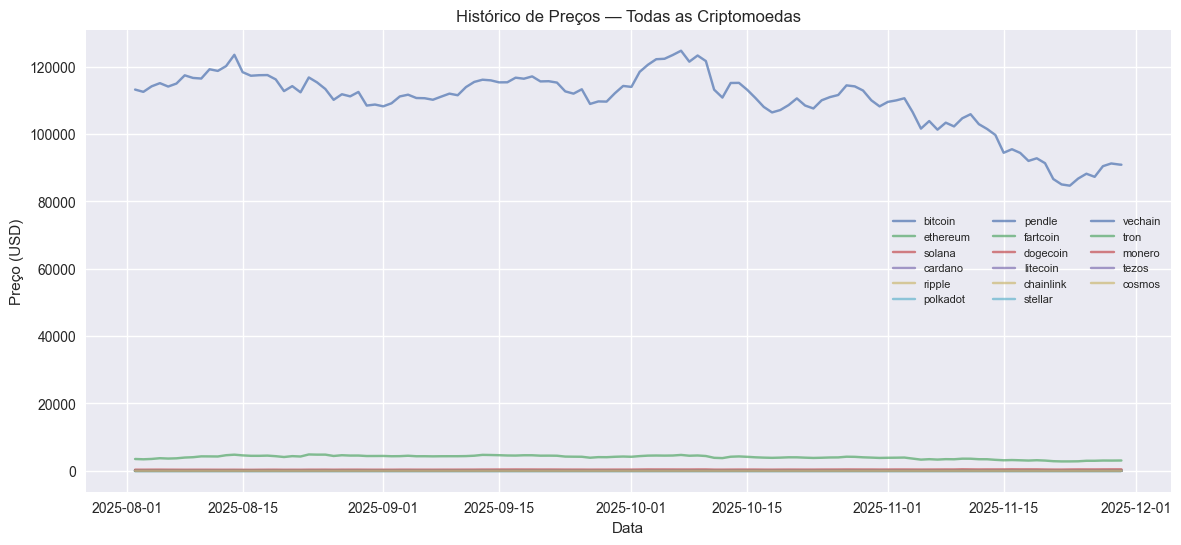

In [6]:
plt.figure(figsize=(14,6))

for coin in df['coin'].unique():
    subset = df[df['coin']==coin]
    plt.plot(subset['timestamp'], subset['price'], alpha=0.7, label=coin)

plt.title("Histórico de Preços — Todas as Criptomoedas")
plt.xlabel("Data")
plt.ylabel("Preço (USD)")
plt.legend(ncol=3, fontsize=8)
plt.grid(True)
plt.show()

## Visualização individual — Bitcoin


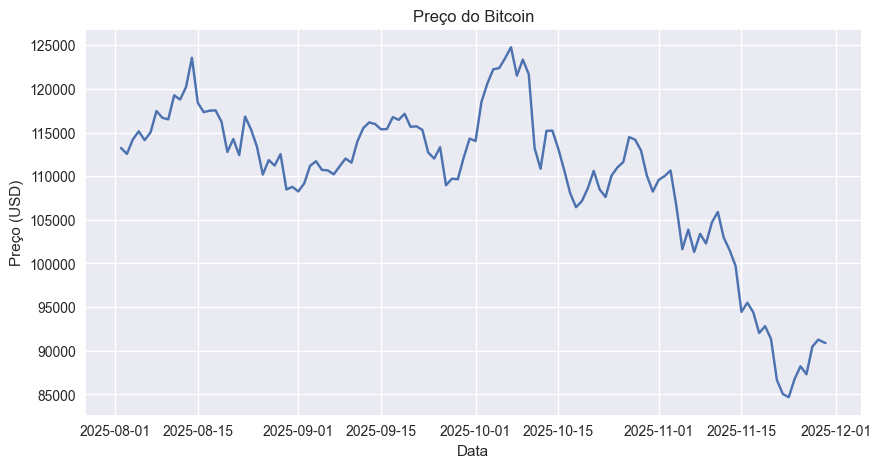

In [7]:
btc = df[df['coin']=='bitcoin']

plt.figure(figsize=(10,5))
plt.plot(btc['timestamp'], btc['price'])
plt.title("Preço do Bitcoin")
plt.xlabel("Data")
plt.ylabel("Preço (USD)")
plt.grid(True)
plt.show()

## Analisando o volume negociado
Volume é fundamental para entender risco e liquidez.


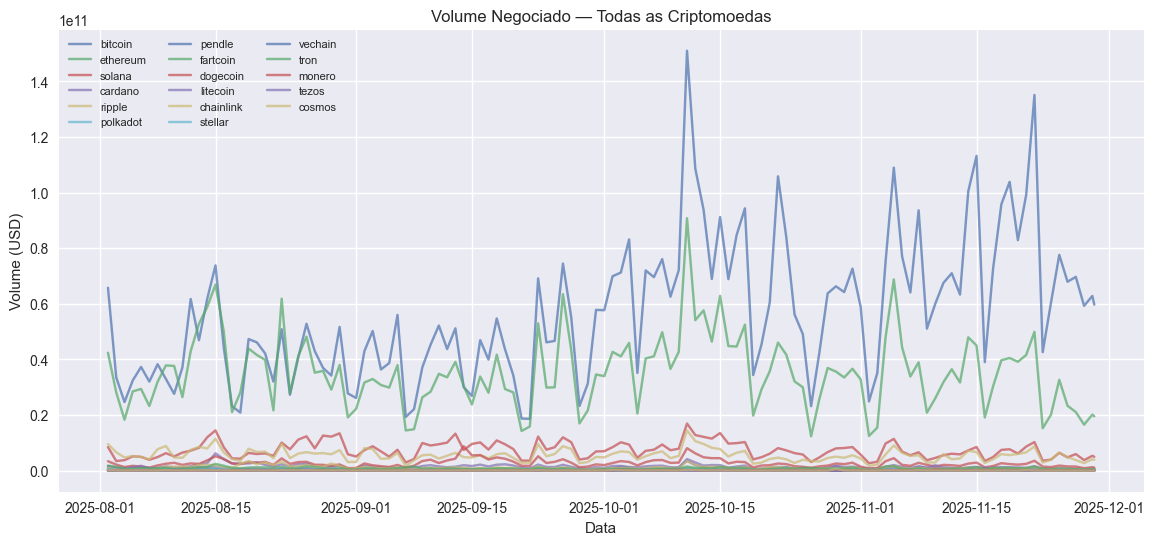

In [8]:
plt.figure(figsize=(14,6))

for coin in df['coin'].unique():
    subset = df[df['coin']==coin]
    plt.plot(subset['timestamp'], subset['volume'], alpha=0.7, label=coin)

plt.title("Volume Negociado — Todas as Criptomoedas")
plt.xlabel("Data")
plt.ylabel("Volume (USD)")
plt.legend(ncol=3, fontsize=8)
plt.grid(True)
plt.show()

## Distribuição dos preços (Histograma)


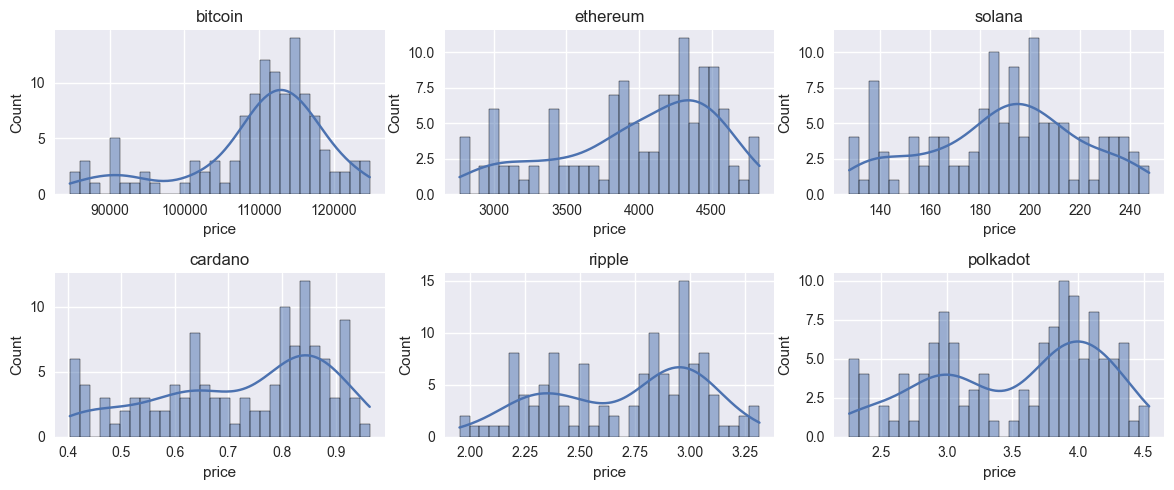

In [9]:
plt.figure(figsize=(12,5))

for i, coin in enumerate(df['coin'].unique()[:6]):
    plt.subplot(2,3,i+1)
    subset = df[df['coin']==coin]
    sns.histplot(subset['price'], bins=30, kde=True)
    plt.title(coin)

plt.tight_layout()
plt.show()

## Correlação entre criptomoedas
Usamos o preço médio diário para entender relações entre ativos.


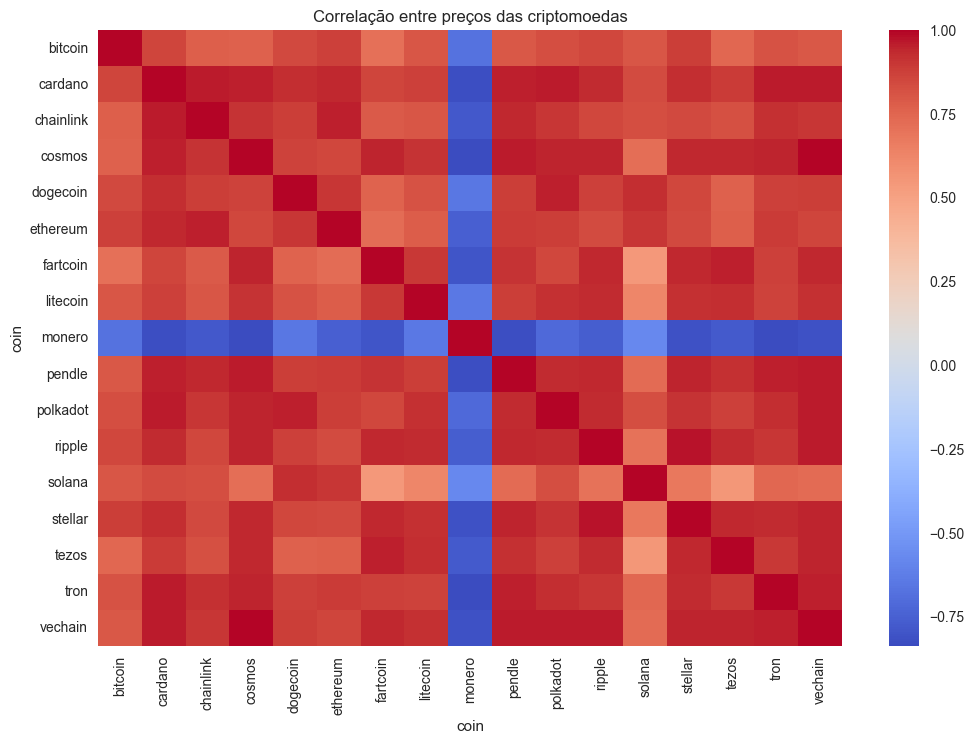

In [10]:
# média diária por coin
daily_price = df.pivot_table(index="timestamp", columns="coin", values="price")

corr = daily_price.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Correlação entre preços das criptomoedas")
plt.show()